### 1. Import packages

In [1]:
#'Pandas' is used for data manipulation and analysis
import pandas as pd

#'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

#'Matplotlib' is a data visualization library for 2D & 3D plots, built on numpy
import matplotlib.pyplot as plt

#'datetime' is used to perform date & time operations
import datetime as dt

#'StandardScaler' is from sklearn.preprocessing module is used to scale the data
from sklearn.preprocessing import StandardScaler

#'eig' from numpy.linalg to calculate eigen values & eigen vectors
from numpy.linalg import eig

#'PCA' function to perform Pricipal Component Analysis using sklearn library
from sklearn.decomposition import PCA

### 2. Read the Data

In [2]:
#read the data
raw_data = pd.read_csv(r"C:\zubeda\PGA02_Zubu\Machine Learning Models\PCA\Principal Component Analysis (PCA)\Dataset\houseprice.csv")

#print first 5 rows
raw_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### 3. Understand and Prepare the Data

In [3]:
#chect the data types for variables
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
#get the shape
print(raw_data.shape)

(1460, 81)


In [5]:
#Use .astype() to change the data type
#Use ' for loop' to change the data type of a large number of columns
for feature in ['MSSubClass', 'OverallQual', 'OverallCond']:
    raw_data[feature] = raw_data[feature].astype('object')

In [6]:
#'now().year' gives the current year
#store the year as 'current_year'
current_year = int(dt.datetime.now().year)

In [7]:
#creating 2 new columns as 'Building_age' and 'Remodel_age'
Building_age = current_year - raw_data.YearBuilt
Remodel_age = current_year - raw_data.YearRemodAdd

In [8]:
#add the above columns in our dataframe
raw_data['Building_age'] = Building_age
raw_data['Remodel_age'] = Remodel_age

In [9]:
#print the head of the data to check whether the new columns are added or not
raw_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Building_age,Remodel_age
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,2,2008,WD,Normal,208500,18,18
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,5,2007,WD,Normal,181500,45,45
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,9,2008,WD,Normal,223500,20,19
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,2,2006,WD,Abnorml,140000,106,51
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,12,2008,WD,Normal,250000,21,21


In [10]:
raw_data.shape

(1460, 83)

**Missing Data Treatment**

In [11]:
# sorting variables on the basis of null values
# 'ascending = False' sorts values in descending order
Total = raw_data.isnull().sum().sort_values(ascending=False)

# percentage  of missing values
Percent = (raw_data.isnull().sum() * 100 / raw_data.isnull().sum().count()).sort_values(ascending=False)

# concat the 'Total' and 'Percent' columns using 'concat' function
# 'keys' is the list of column names
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total, Percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
PoolQC,1453,1750.602410
MiscFeature,1406,1693.975904
Alley,1369,1649.397590
Fence,1179,1420.481928
FireplaceQu,690,831.325301
...,...,...
FullBath,0,0.000000
HalfBath,0,0.000000
BedroomAbvGr,0,0.000000
KitchenAbvGr,0,0.000000


**Replace the 'NA' values with their actual meaning as per the data definition**

In [12]:
# replcae the NA values in 'Alley' with a valid value, 'No alley access'
raw_data['Alley'].fillna('No alley access', inplace=True)

In [13]:
# replcae the NA values in 'Alley' with a valid value, 'None'
raw_data['MasVnrType'].fillna('None', inplace=True)

In [14]:
# use 'for' loop for filling NA with 'No Basement' in the following 5 columns
for col in ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']:
    raw_data[col].fillna('No Basement', inplace=True)

In [15]:
# replace NA values in 'Electrical' with mode 'SBrkr'
raw_data['Electrical'].fillna('SBrkr', inplace=True)

In [16]:
# replace NA values in 'FireplaceQu' with valid value 'No Fireplace'
raw_data['FireplaceQu'].fillna('No Fireplace', inplace=True)

In [17]:
# use 'for' loop for filling NA with 'No Garage' in the following columns
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    raw_data[col].fillna('No Garage', inplace=True)

In [18]:
# replace NA values in 'PoolQC' with valid value 'No Pool'
raw_data['PoolQC'].fillna('No Pool', inplace=True)

In [19]:
# replace NA values in 'Fence' with valid value 'No Fence'
raw_data['Fence'].fillna('No Fence', inplace=True)

In [20]:
# replace NA values in 'MiscFeature' with valid value 'None'
raw_data['MiscFeature'].fillna('None', inplace=True)

In [21]:
# Replace 'LotFrontage' 17.74% of missing values with its median value
raw_data['LotFrontage'].fillna(raw_data['LotFrontage'].median(), inplace=True)

In [22]:
# Replace 'MasVnrArea' 0.55% of missing values with 0 mode
raw_data['MasVnrArea'].fillna(0, inplace=True)

In [23]:
# Replace 'GarageYrBlt' missing values with 0 mode
raw_data['GarageYrBlt'].fillna(0, inplace=True)

In [24]:
raw_data.isnull().any().sum()

0

### 4. Compute PCA

**1) Prepare the Data**

In [25]:
# Select the numerical variables and store it as 'df_numerical_features'
df_numerical_features = raw_data.select_dtypes(include=[np.number])

# to select all the 'numerical' features(independent variables), drop the target variable from 'df_numerical_features'
# use 'drop' function to drop entire column
df_num = df_numerical_features.drop(['SalePrice'], axis=1)

# head() to display top 5 rows
df_num.head()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Building_age,Remodel_age
0,1,65.0,8450,2003,2003,196.0,706,0,150,856,...,61,0,0,0,0,0,2,2008,18,18
1,2,80.0,9600,1976,1976,0.0,978,0,284,1262,...,0,0,0,0,0,0,5,2007,45,45
2,3,68.0,11250,2001,2002,162.0,486,0,434,920,...,42,0,0,0,0,0,9,2008,20,19
3,4,60.0,9550,1915,1970,0.0,216,0,540,756,...,35,272,0,0,0,0,2,2006,106,51
4,5,84.0,14260,2000,2000,350.0,655,0,490,1145,...,84,0,0,0,0,0,12,2008,21,21


**2) Scale the Data**

In [26]:
#fit_transform() transforms the data by first computing the mean and sd & later scaling the data
df_num_std = StandardScaler().fit_transform(df_num)

print(df_num_std)

[[-1.73086488 -0.22087509 -0.20714171 ...  0.13877749 -1.05099379
  -0.87866809]
 [-1.7284922   0.46031974 -0.09188637 ... -0.61443862 -0.15673371
   0.42957697]
 [-1.72611953 -0.08463612  0.07347998 ...  0.13877749 -0.9847523
  -0.83021457]
 ...
 [ 1.72611953 -0.1754621  -0.14781027 ...  1.64520971  1.00249232
  -1.02402865]
 [ 1.7284922  -0.08463612 -0.08016039 ...  1.64520971  0.70440562
  -0.53949344]
 [ 1.73086488  0.23325479 -0.05811155 ...  0.13877749  0.20759447
   0.96256569]]


In [27]:
# 'shape' function gives the total number of rows and columns in the scaled data
df_num_std.shape

(1460, 36)

**3) Covariance Matrix**

In [28]:
# generate the covariance matric using 'cov' function
cov_mat = np.cov(df_num_std.T)

# as 'cov_mat' is a numpy array, select first 5 observations with [0:5]
print(cov_mat[0:5])

[[ 1.00068540e+00 -9.92826576e-03 -3.32482914e-02 -1.27214287e-02
  -2.20127191e-02 -5.11064057e-02 -5.02749253e-03 -5.97176221e-03
  -7.94514524e-03 -1.54251313e-02  1.05032350e-02  5.59368017e-03
  -4.42602733e-02  8.27842782e-03  2.29012418e-03 -2.01685593e-02
   5.59128255e-03  6.78846092e-03  3.77444066e-02  2.95325914e-03
   2.72573939e-02 -1.97851839e-02  1.35004074e-02  1.65810340e-02
   1.76458647e-02 -2.96635146e-02 -4.77238200e-04  2.89119814e-03
  -4.66667524e-02  1.33112036e-03  5.70830027e-02 -6.24668340e-03
   2.11866880e-02  7.12281881e-04  1.27214287e-02  2.20127191e-02]
 [-9.92826576e-03  1.00068540e+00  3.04730891e-01  1.16765369e-01
   8.34052140e-02  1.78590896e-01  2.14513541e-01  4.24923323e-02
   1.24183267e-01  3.63721436e-01  4.14056133e-01  7.24376356e-02
   3.74949923e-02  3.68259672e-01  9.04047865e-02 -6.98377770e-03
   1.80657531e-01  4.72540062e-02  2.37002365e-01 -4.90803219e-03
   3.20737339e-01  2.33380490e-01  9.92638352e-02  2.69723997e-01
   3.2373

**4) Compute Eigenvalues and Eigenvectors**

In [29]:
# use 'eig' function to compute Eigenvalues and Eigenvectors of the covariance vectors
eig_val, eig_vec = np.linalg.eig(cov_mat)

print('Eigenvalues: ', '\n', '\n', eig_val, '\n')
print('Eigenvectors: ', '\n', '\n', eig_vec, '\n')

Eigenvalues:  
 
 [ 7.02179173e+00+0.00000000e+00j  3.31318344e+00+0.00000000e+00j
  2.62014376e+00+0.00000000e+00j  1.89714381e+00+0.00000000e+00j
  1.49857119e+00+0.00000000e+00j  9.99262867e-02+0.00000000e+00j
  1.36211771e-01+0.00000000e+00j  1.94640489e-01+0.00000000e+00j
  2.13801472e-01+0.00000000e+00j  3.00380456e-01+0.00000000e+00j
  3.53762644e-01+0.00000000e+00j  4.01128263e-01+0.00000000e+00j
  1.27687245e+00+0.00000000e+00j  5.43959006e-01+0.00000000e+00j
  5.57115248e-01+0.00000000e+00j  6.14431186e-01+0.00000000e+00j
  6.59132631e-01+0.00000000e+00j  6.52840604e-01+0.00000000e+00j
  1.17647102e+00+0.00000000e+00j  1.13447502e+00+0.00000000e+00j
  1.12592768e+00+0.00000000e+00j  1.09343693e+00+0.00000000e+00j
  1.04401166e+00+0.00000000e+00j  1.02896692e+00+0.00000000e+00j
  9.99080608e-01+0.00000000e+00j  9.66885771e-01+0.00000000e+00j
  9.57630937e-01+0.00000000e+00j  8.94025715e-01+0.00000000e+00j
  8.34764729e-01+0.00000000e+00j  8.45966165e-01+0.00000000e+00j
  7.975

**5) Decide the No. of Princiapal Components**

In [30]:
# Eigenvalues greater than 1
# create the list of eigenvalues
eig_val = list(eig_val)

#'sort(reverse=True)' will sort the eigenvalues in the descending order
eig_val.sort(reverse=True)
print(eig_val)

[(7.021791732999374+0j), (3.3131834374078046+0j), (2.620143757200951+0j), (1.8971438113148202+0j), (1.4985711938914759+0j), (1.2768724520305208+0j), (1.1764710217140895+0j), (1.1344750158558465+0j), (1.1259276821921596+0j), (1.093436934284549+0j), (1.0440116632724479+0j), (1.028966915423302+0j), (0.999080608411793+0j), (0.966885770577017+0j), (0.957630936675665+0j), (0.8940257153337101+0j), (0.8459661650894021+0j), (0.834764728975647+0j), (0.7975648985595455+0j), (0.7704299359464271+0j), (0.6591326308403379+0j), (0.6528406036790155+0j), (0.6144311862459941+0j), (0.5571152482491212+0j), (0.5439590064615208+0j), (0.40112826321759004+0j), (0.3537626440686832+0j), (0.30038045588219286+0j), (0.2138014724307727+0j), (0.19464048901475797+0j), (0.13621177055098752+0j), (0.09992628674667764+0j), (-4.832723321260668e-17+0j), (-5.2256821368847057e-17+1.3829022372414312e-16j), (-5.2256821368847057e-17-1.3829022372414312e-16j), (-4.124131623691277e-16+0j)]


C:\Users\ashraf\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


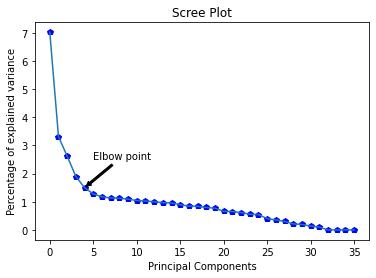

In [31]:
# Scree plot
# 'bp' represents blue color & pentagonal shape of points
plt.plot(eig_val, 'bp')

# plot a line plot
plt.plot(eig_val)

# label the x-axis
plt.xlabel('Principal Components')

# label the y-axis
plt.ylabel('Percentage of explained variance')

# use 'annonate' function to draw an arrow between points xy and xytext
# 's' is a argument to write text
# we can change the facecolor and arrowstyle; this is only for representation purpose
plt.annotate(text='Elbow point', xy=(4, 1.5), xytext=(5, 2.5), arrowprops=dict(facecolor='black', arrowstyle='simple'))

# title of the plot
plt.title("Scree Plot")

plt.show()

**6) PCA**

In [32]:
# specify required no. of components
# take 'n_components=5' based on the analysis of scree plot
pca = PCA(n_components=5, random_state=0)

# fit_transform() computes the principal components
# pass the standardized data to fit PCA
PrincipalComponents = pca.fit_transform(df_num_std)
PrincipalComponents

array([[ 1.57486557, -0.27222328, -1.58778585, -2.17954341,  0.92355349],
       [ 0.20319675, -0.85811344,  1.05018224,  0.02903493, -0.76668867],
       [ 1.7440671 , -0.28132481, -1.39892348, -1.61911608,  0.14982933],
       ...,
       [ 0.8007876 ,  3.06576114, -0.41418935,  0.02813404,  1.15085413],
       [-2.26685356, -1.83761697,  1.64206121, -1.13884632,  0.6339446 ],
       [-0.69648102, -0.99315962,  1.91010653, -1.96976405,  0.46587467]])

In [33]:
# create a dataframe of principal components
PCA_df = pd.DataFrame(PrincipalComponents, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

# head() to display top 5 rows
PCA_df.head()

,PC1,PC2,PC3,PC4,PC5
0,1.574866,-0.272223,-1.587786,-2.179543,0.923553
1,0.203197,-0.858113,1.050182,0.029035,-0.766689
2,1.744067,-0.281325,-1.398923,-1.619116,0.149829
3,-1.467107,1.832697,1.515536,-0.118626,-1.524802
4,4.219838,1.091179,-0.538118,-1.612861,-0.263856


### 5. Linear Regression

In [34]:
df = pd.DataFrame(df_numerical_features['SalePrice'])
df_scaled = pd.DataFrame(StandardScaler().fit_transform(df), columns=['SalePrice'])
X = PCA_df
y = df_scaled['SalePrice']

In [35]:
#We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)

#Splitting the data into Training and Testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100) #Randomly picked 70% training set, 30% test set

In [36]:
# Importing RFE and LinearRegression
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train) #Training/Fitting the model

LinearRegression()

In [37]:
#y = mx + c, where y = dependent variable, x = independent variable, m = slope, c = constant
#Adding a constant variable
import statsmodels.api as sm
X_train = sm.add_constant(X_train)

#add_constant adds a constant column to input data set
#By default, statsmodels fits a line passing through the origin, i.e. it doesn't fit an intercept.
#Hence, you need to use the command 'add_constant' so that it also fits an intercept.

In [38]:
lm = sm.OLS(y_train, X_train).fit() #fitting model

In [39]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     524.7
Date:                Fri, 31 Dec 2021   Prob (F-statistic):          1.65e-278
Time:                        22:05:27   Log-Likelihood:                -793.60
No. Observations:                1022   AIC:                             1599.
Df Residuals:                    1016   BIC:                             1629.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0041      0.017     -0.251      0.8

In [40]:
#Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

#The Variance Inflation Factor (VIF) is a measure of colinearity among predictor variables within a
#multiple regression.
#A multiple regression is used when a person wants to test the effect of multiple variables on a
#particular outcome. Using variance inflation factors helps to identify the severity of any
#multicollinearity issues so that the model can be adjusted.

vif = pd.DataFrame()
x = X_train
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

#A VIF above 10 indicates high correlation and is cause for concern.

,Features,VIF
0,const,1.0
1,PC1,1.0
2,PC2,1.0
3,PC3,1.0
4,PC4,1.0
5,PC5,1.0


In [41]:
#Residual Analysis of the train data
#So, now to check if the error terms are also normally distributed (which is infact, one of the major
#assumptions of linear regression), let us plot the histogram of the error terms and see what it looks
#like.

y_pred = lm.predict(X_train)
res = (y_pred - y_train)

C:\Users\ashraf\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


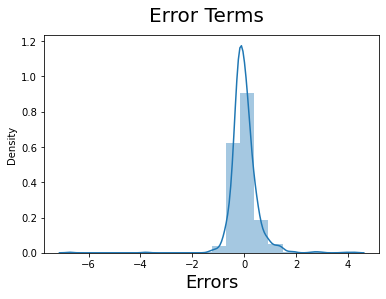

In [42]:
#Plot the histogram of error terms
import seaborn as sns
fig = plt.figure()
sns.distplot((y_train - y_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)  #Plot heading
plt.xlabel('Errors', fontsize = 18)  #X-label
plt.show()

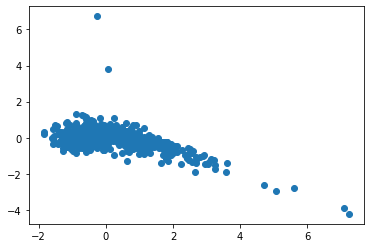

In [43]:
plt.scatter(y_train, res)
plt.show()

#There may be some relation in the error terms.

In [44]:
#Model Evaluation
#Adding constant variable to test df
X_test = sm.add_constant(X_test)

In [45]:
#Now let's use our model to make predictions
#Creating x_test_new df by dropping variables from x_test
X_test_new = X_test[X_train.columns]

In [46]:
#Making predictions
y_pred1 = lm.predict(X_test_new)

In [47]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred1)

0.7504202031658431

Text(0, 0.5, 'y_pred')

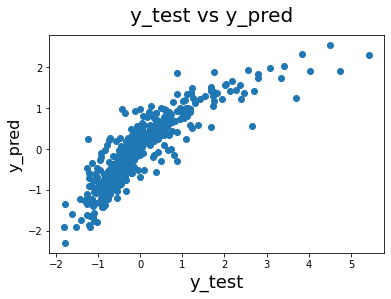

In [48]:
#Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test, y_pred1)
fig.suptitle('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)

In [49]:
#We can see that the equation of our best fitted line is:

price = 0.31*PC1 + 0.00*PC2 + 0.03*PC3 + 0.02*PC4 + 0.01*PC5